# Index 

[Introduction](#00)

[Feature Engineering Techniques](#00)

[1. Reading Data](#01)

[2. Data Analysis](#02)

[-- 2.1 Finding Numerical and Categorical columns and creating dataframe](#2.1)

[-- 2.2 Working with missing values](#2.2)

[3. Outliers Treatment](#03)

[4. Visulization part](#04)

   [--4.1 Categorical Graphs](#4.1)
   
   [--4.2 Numerical Graphs](#4.2)
   
[5. Correlation matrix and Heatmap](#05)

[6. Calculate Memory Usages](#06)

[7. Time Calculation](#07)

[8.Run program / code again in interval of time.](#08)

[9. Define main function ](#09)



# Introduction and Overview of the information in the dataset<a id = "10"></a>

On April 15, 1912, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck resulted in such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

The titanic.csv file contains data for 891 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including whether they survived (S), their age (A), their passenger-class (C), their sex (G) and the fare they paid.

1. Survived - It says whether the passenger has survived or not (0 -- dead, 1 -- survived)
2. Pclass   - It is the information of the class type of the passengers on board
3. SibSp    - It says whether the particular passenger is accompanied by a sibling or spouse (0 -- no               sibling, 1 -- accompanied by someone)
4. Parch    - It says whether passenger is a accompanied by a parent or a child (0 -- no, 1 -- yes)
5. Cabin    - It gives the cabin number of the passengers
6. Embarked - This gives the information of the boarding point of the passengers (S -- Southampton, C -- Cherbourg and Q -- Queenstown)

# Feature Engineering Techniques <a id='1'></a>

Import important liaberies

In [1]:
import time
start_time = time.time()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import os, psutil
import sys
# Shedule program to run in every Hour, day, Minute
import schedule
import time
import glob
import os
warnings.filterwarnings('ignore')

### 1.Reading Data<a id = "01"></a>

In [3]:
#Read only one file in location
def read_data(data):
    df=pd.read_csv(data)
    print("data is readed")
    return df

In [4]:
# Using glob we can read multiple files in  particular directory/ path
def read_mul_file():
    def inner(path=input("enter yur path / Directory :")):
    #     inpt = input("Enter path here : ")
        path = path+'*.csv'
        for file in glob.glob(path, recursive=True):
            print("All files are : ",file)
            df = pd.read_csv(file)
            print(df.head())
# read_mul_file()

# # using glob to match every pathname
# print('Inside current directory')
# for item in glob.glob("*"):
#     print(item)

# # Match every files and folder from a given folder
# print('Inside Sales folder')
# for item in glob.glob("Downloads/*"):
#     print(item)

# print('All files starts with word march')
# for item in glob.glob("Downloads/march*"):
#     print(item)

### 2.Data Analysis<a id = "02"></a>

In [5]:
def analysis(data):
    print("Shape :",data.shape)
    print("Size :", data.size)
    print("Information of data columns or features :\n",data.info)
    print("Description of data : \n",data.describe())
    #finding missing values
    print(data.isnull().sum())
    #no.of unique values
    print(data.apply(lambda x: len(x.unique())))

### 2.1 Finding Numerical and Categorical columns and creating dataframe<a id='2.1'></a>

In [6]:
def num_col(data):
    #list of all numerical_columns
    num =[feature for feature in data.columns if data[feature].dtypes!='object']
    print('no.of numerical_features:',len(num))
    print('numerical_features are',num)
    data = data[num]
    return data
def cato_col(data):
    #List of all categorical columns
    cato = [feature for feature in data.columns if data[feature].dtype=='object']
    print('no. of categorical_features',len(cato))
    print('categorical_features list', cato)
    data = data[cato]
    return data


### 2.2 Working with missing values <a id="2.2"></a>

In [7]:
#filling nan values in numerical data.
def num_fillna(data):
    for col in data.columns:
        data[col] = data[col].fillna(data[col].median())
    print("Nan valued are filled : \n", data.isnull().sum())
    return data
#filling Nan values in Categorical data
def cat_fillna(data):
    df = data.bfill(axis=0)
    print("Nan valued are filled : \n", df.isnull().sum())
    return df
        

### 3. Outliers Treatment <a id='02'></a>


Only two columns 'Age' and 'Fare' are to be examined for outlier analysis.

In [8]:
def outliers(data):    
    for col in data:
        print('Q1 ---> ' + col, data[col].quantile(0.25))
        print('Q3 ---> ' + col, data[col].quantile(0.75))
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        print('IQR of ' + col, IQR)
        lower_limit = q1 - (1.5 * IQR)
        upper_limit = q3 + (1.5 * IQR)
        print('Lower limit of ---> ' + col, lower_limit)
        print('Upper Limit of ---> ' + col, upper_limit)
        upper_outlier = len(data[col][data[col] > upper_limit])
        lower_outlier = len(data[col][data[col] < lower_limit])
        print('Outlier of the upper limit is', upper_outlier)
        print('Outlier of the lower limit is', lower_outlier)
        overall_outliers = upper_outlier + lower_outlier
        print('The number of outliers in ---> ' + col, overall_outliers)
        print(col, 'contains', np.round((overall_outliers/len(data[col])*100), 2), '% of outliers in it')


### 4.Visulization part<a id = "04"></a>

In [9]:
#ploting a pairplot of dataframe
def pairplt(data):
    sns.pairplot(data,height=2)
    plt.show()

### Categorical Graphs <a id='4.1'></a>

In [10]:
def cato_plt(data):
    for feature in data:
        if len(data[feature].unique()) < 10:   #Cheacking the length unique feature in columns
            def bar_plot(func):
                def barplot():
                    plt.figure(figsize=(15,6))
                    plt.subplot(1,2,1)
                    print(data[feature].value_counts(normalize=True).plot.bar())
                    print("Barplot")
                return barplot()
    
            def pie_plot(func):
                def pieplot():
                    plt.figure(figsize=(15,6))
                    plt.subplot(1,2,1)
                    print(data[feature].value_counts(normalize=True).plot.pie(autopct='%1.0f%%'))
                    #func()
                    print("pieplot")
                return pieplot()
    
            def count_plot(func):
                def countplot():
                    plt.figure(figsize=(15,6))
                    plt.subplot(1,2,1)
                    print(sns.countplot(x=data[feature],data=data))
                    func()
                    print("countplot")
                return countplot()
    
            @bar_plot
            @pie_plot
            @count_plot
            def plotting():
                print("ALL_PLOTS_BELOW")
    

### Numerical graphs <a id='4.2' ></a>

In [11]:
def numerical_plt(data):
    for feature in data:
        def hist_plot(func):
            def histplot():
                print(data[feature].hist(bins=25))
                plt.xlabel(feature)
                plt.ylabel('count')
                plt.title(feature)
                plt.show()
            return histplot() 
    
        def dist_plot(func):
            def distplot():
                print(sns.FacetGrid(data,size=5).map(sns.distplot,feature).add_legend())
                plt.xlabel(feature)
                plt.ylabel('count')
                plt.title(feature)
                plt.show()
            return distplot()
    
        def box_plot(func):
            def boxplot():
                print(sns.boxplot(x=feature,data=data))
                plt.xlabel(feature)
                plt.ylabel('count')
                plt.title(feature)
                plt.show()
            return boxplot()
    
        def violin_plot(func):
            def violinplot():
                print(sns.violinplot(x=feature,data=data))
                plt.xlabel(feature)
                plt.ylabel('count')
                plt.title(feature)
                plt.show()
            return violinplot()
    
        @hist_plot
        @dist_plot
        @box_plot
        @violin_plot
        def plotting():
            print("ALL_PLOTS_BELOW")

### 5. Correlation matrix and Heatmap <a id='05'></a>

In [12]:
def correlation(data):
    corr = data.corr()
    print(corr)
    ax = sns.heatmap(corr, vmin=-1, vmax=1,annot=True, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
    

### 6. Calculate Memory Usages <a id='06' ></a>

In [13]:
def memory():
    pid = os.getpid()
    print("Process Id.----->",pid)
    ps = psutil.Process(pid)
    print(ps)
    #get memory usages info
    memory_info = ps.memory_full_info()
    print(memory_info)

In [14]:
def obj_size():
    # These are the usual ipython objects, including this one you are creating
    ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
    # Get a sorted list of the objects and their sizes
    sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') 
            and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

### 7. Time Calculation <a id='07' ></a>

In [15]:
def time_of_execuation():   
    end_time = time.time()   
    a = end_time - start_time
    print("time required to run is :",{a},"Sec")

### 8.Run program / code again in interval of time. <a id='08' ></a>
with specific time---. Second, Minutes, Hour, Day....etc.

In [16]:
# def run_again():
#     def show_name():
#         print("1. shubham is running a program")
#         print("2. Please refer this code")
#     schedule.every(10).seconds.do(show_name)

#     while 1:
#         schedule.run_pending()
#         time.sleep(1)

### 9. Define main() function <a id='09'></a>

In [17]:
def main():
    path=input("enter yur path / Directory :")
#     inpt = input("Enter path here : ")
    dta = path
    df = read_data(dta)         #Reading data
    ana = analysis(df)                     #Analysing data with size, shape,....etc.
    numerical_columns_data = num_col(df)   #Creating dataframe with numerical features
    categorical_columns_data = cato_col(df) #Creating dataframe with categorical features
    
    numfillna = num_fillna(numerical_columns_data)
    catofillna = cat_fillna(categorical_columns_data)
    
    outliers_data = outliers(numerical_columns_data) #finding outliers in numerical data
    correlation_data_plot = correlation(df)
    pairplt(df)
    categorical_plot = cato_plt(categorical_columns_data)  #Creating plots of categorical data
    numerical_plot = numerical_plt(numerical_columns_data)  #Creating plots of numerical data
    mem = memory()
    ob_size = obj_size()
    time = time_of_execuation()
#     run_again()

enter yur path / Directory :C:/Users/ShubhamSurya_ljtsrll/AI-Training/Machine Learning/Feature Scaling/Assignments/Titanic.csv
data is readed
Shape : (891, 12)
Size : 10692
Information of data columns or features :
 <bound method DataFrame.info of      PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnst

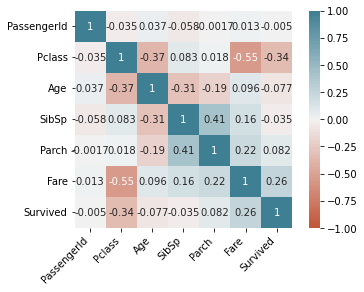

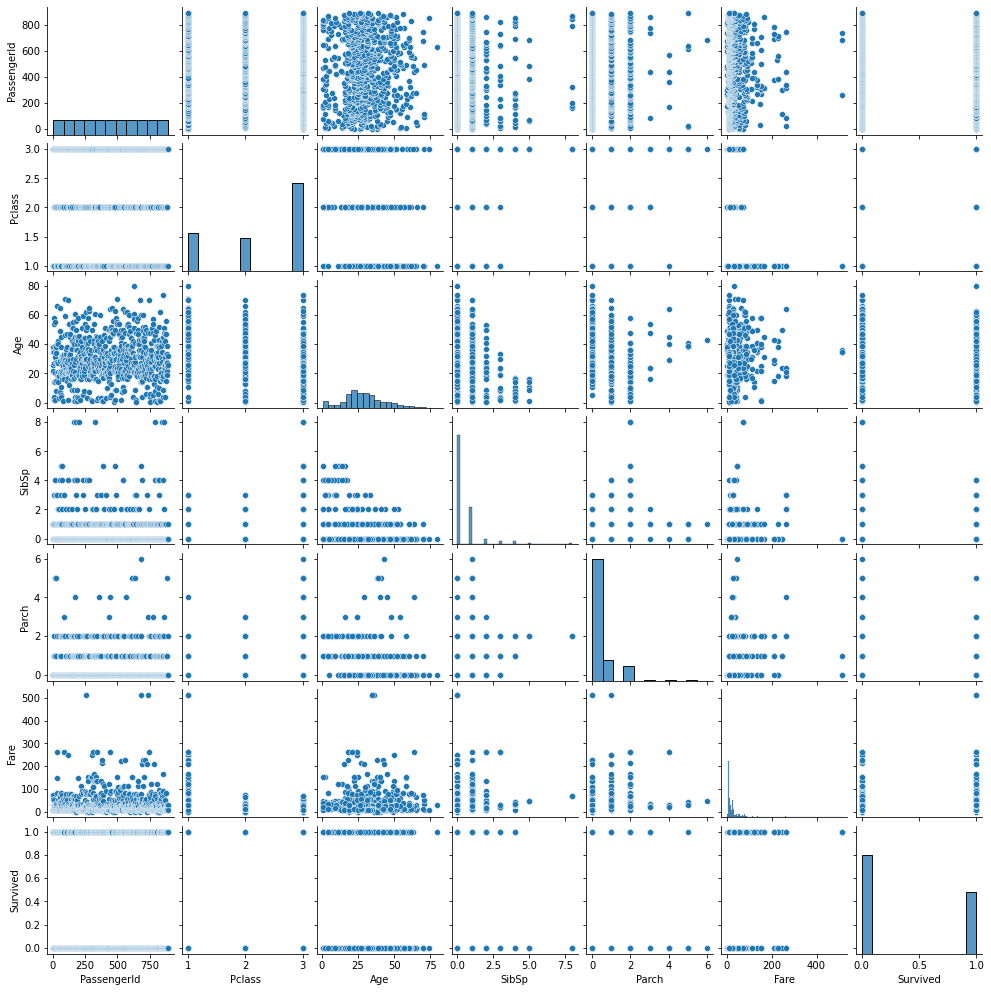

AxesSubplot(0.125,0.125;0.352273x0.755)
ALL_PLOTS_BELOW
countplot
AxesSubplot(0.150136,0.125;0.302x0.755)
pieplot
AxesSubplot(0.125,0.125;0.352273x0.755)
Barplot
AxesSubplot(0.125,0.125;0.352273x0.755)
ALL_PLOTS_BELOW
countplot
AxesSubplot(0.150136,0.125;0.302x0.755)
pieplot
AxesSubplot(0.125,0.125;0.352273x0.755)
Barplot
AxesSubplot(0.125,0.125;0.352273x0.755)


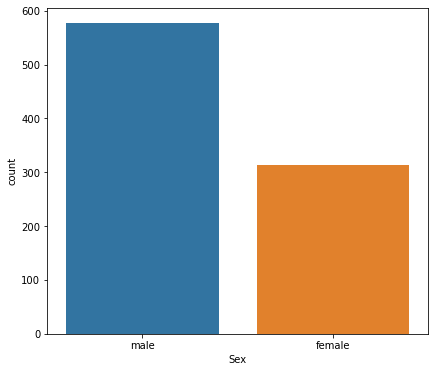

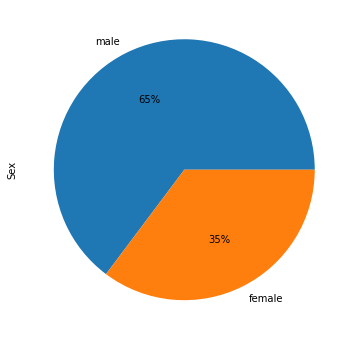

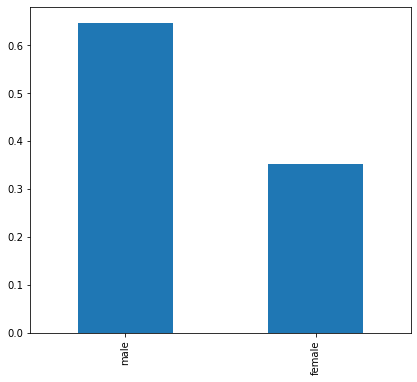

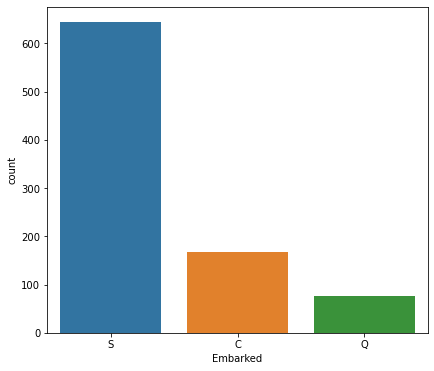

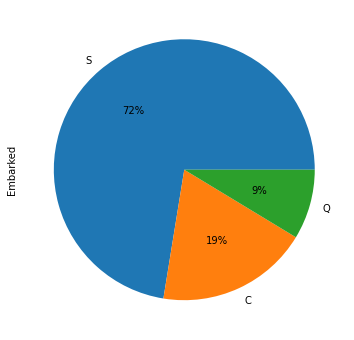

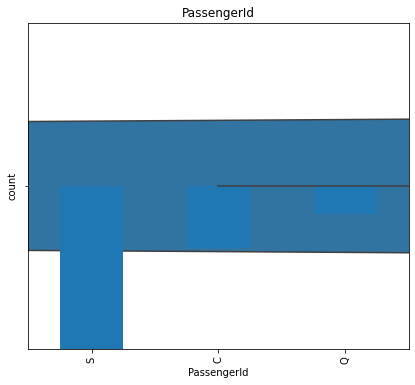

AxesSubplot(0.125,0.125;0.775x0.755)


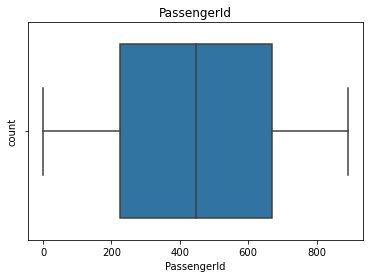

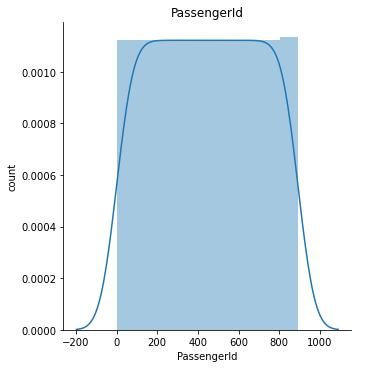

AxesSubplot(0.125,0.125;0.775x0.755)


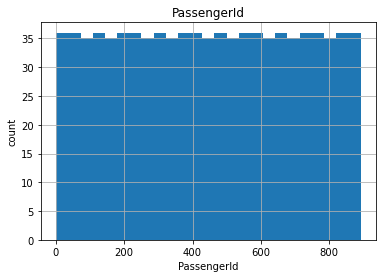

AxesSubplot(0.125,0.125;0.775x0.755)


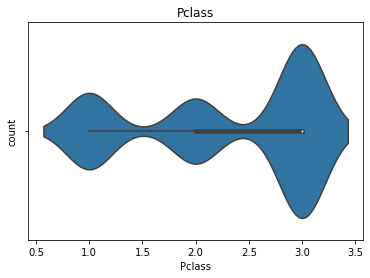

AxesSubplot(0.125,0.125;0.775x0.755)


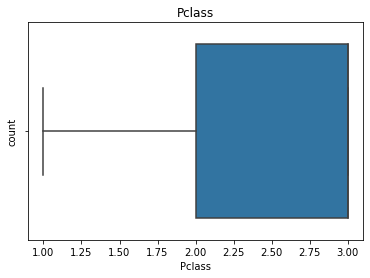

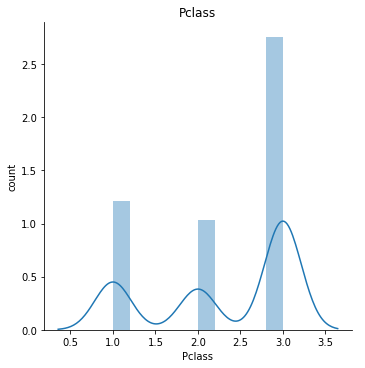

AxesSubplot(0.125,0.125;0.775x0.755)


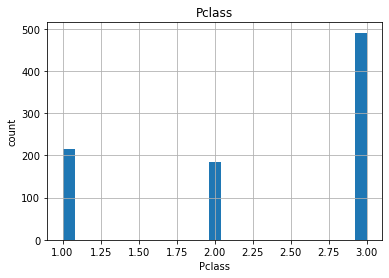

AxesSubplot(0.125,0.125;0.775x0.755)


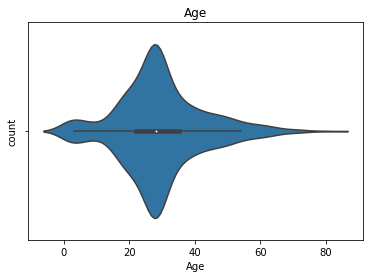

AxesSubplot(0.125,0.125;0.775x0.755)


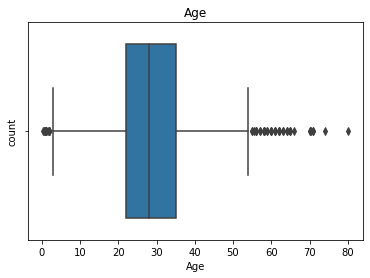

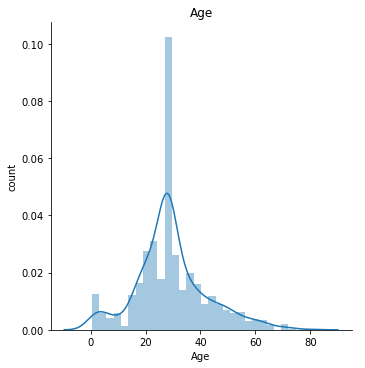

AxesSubplot(0.125,0.125;0.775x0.755)


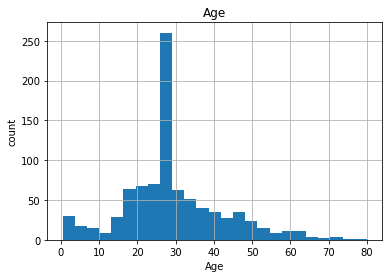

AxesSubplot(0.125,0.125;0.775x0.755)


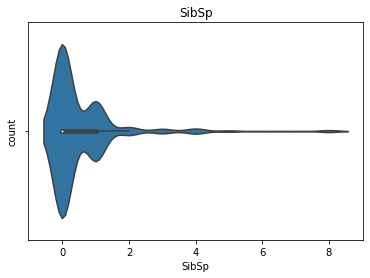

AxesSubplot(0.125,0.125;0.775x0.755)


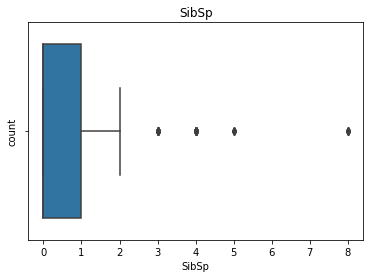

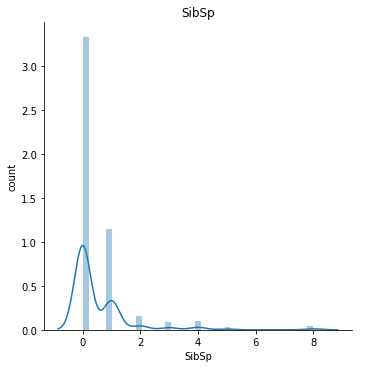

AxesSubplot(0.125,0.125;0.775x0.755)


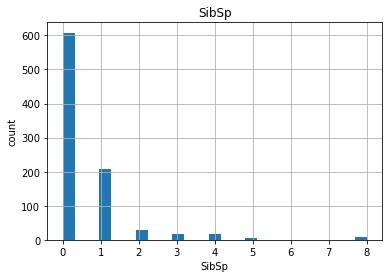

AxesSubplot(0.125,0.125;0.775x0.755)


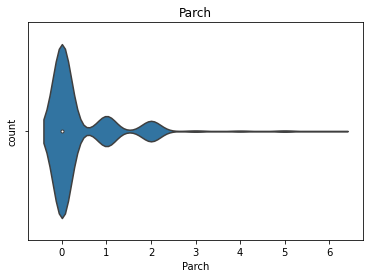

AxesSubplot(0.125,0.125;0.775x0.755)


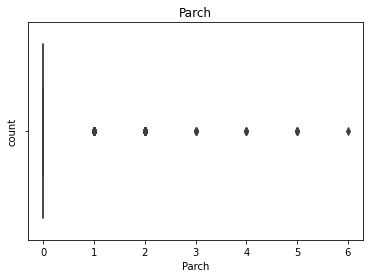

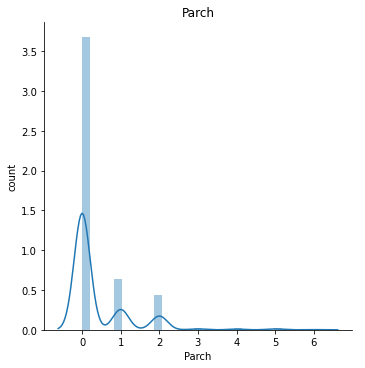

AxesSubplot(0.125,0.125;0.775x0.755)


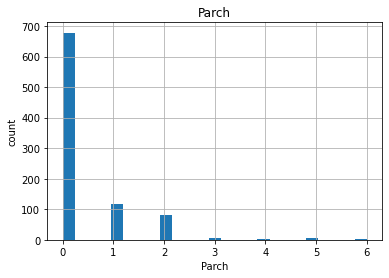

AxesSubplot(0.125,0.125;0.775x0.755)


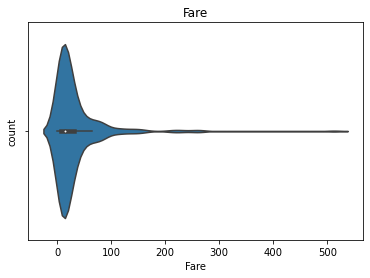

AxesSubplot(0.125,0.125;0.775x0.755)


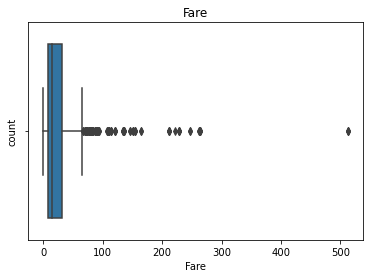

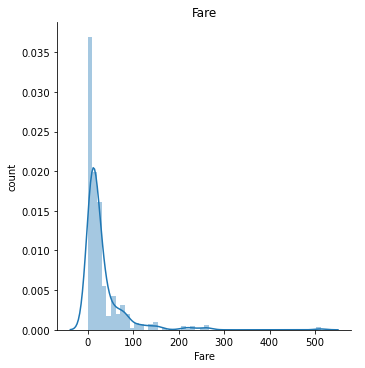

AxesSubplot(0.125,0.125;0.775x0.755)


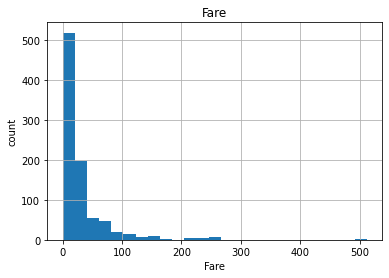

AxesSubplot(0.125,0.125;0.775x0.755)


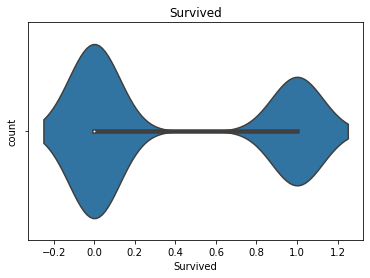

AxesSubplot(0.125,0.125;0.775x0.755)


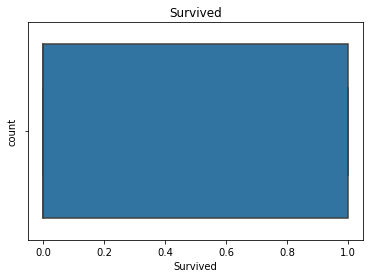

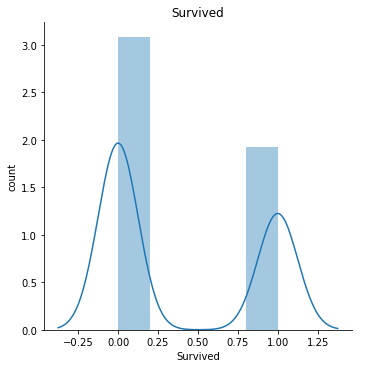

AxesSubplot(0.125,0.125;0.775x0.755)


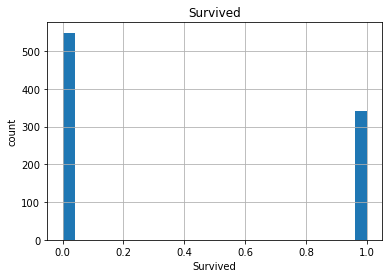

Process Id.-----> 13060
psutil.Process(pid=13060, name='python.exe', status='running', started='20:04:25')
pfullmem(rss=193224704, vms=211566592, num_page_faults=63940, peak_wset=226271232, wset=193224704, peak_paged_pool=871872, paged_pool=825624, peak_nonpaged_pool=441456, nonpaged_pool=197792, pagefile=211566592, peak_pagefile=244543488, private=211566592, uss=159064064)
time required to run is : {14.04277229309082} Sec


In [18]:
#Program will execute from this file
if __name__=="__main__":
    main()